In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from ultralytics import YOLO

## 0. Functions

In [2]:
def convert_from_yolo_to_cv2(input_txt, width=28*5, height=28):
    
    updated=[]
    annotations = input_txt.split('\n')[:-1]
#     num_digits = len(annotations)
#     width = 28*5
#     height = 28
    
    for i in annotations:
        temp = i.split(' ')
        temp[1] = round(float(temp[1])*(width))
        temp[2] = round(float(temp[2])*(height))
        temp[3] = round(float(temp[3])*(width))
        temp[4] = round(float(temp[4])*(height))

        # x min
        x_min = int(temp[1]-temp[3]/2)
        x_max = int(temp[1]+temp[3]/2)
        y_min = int(temp[2]-temp[4]/2)
        y_max = int(temp[2]+temp[4]/2)

        updated.append([temp[0], x_min,x_max,y_min,y_max])
    
    return updated

In [65]:
def get_img_with_boxes(img_sample, ann_sample):
    img_sample = np.array(img_sample)
    
    
    for i in ann_sample:
        img_sample = cv2.rectangle(np.array(img_sample),
                                   pt1=(i[1],i[4]),
                                   pt2=(i[2],i[3]),
                                   color=(255,255,255), thickness=1)
        img_sample = cv2.putText(img_sample, i[0], (i[1], i[4]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,10,255), 1)
    
    print(sorted([(i[1], i[0]) for i in ann_sample]))
        
    
    return img_sample

## Run model prediction (GANs perturbation, 256)

In [200]:
perturbed_img_path = "fgsm_sample_perturbed_images_0.25_targ"

In [201]:
model=YOLO('./model_results/model_digit_data_ver1_256/weights/best.pt')

In [202]:
data = os.listdir(f'./{perturbed_img_path}/')
data_perturbed = [i for i in data if 'perturbed_' in i]
data_perturbed_label = [i.replace('png','txt') for i in data_perturbed]

In [203]:
data_org = [i for i in data if 'original' in i]
data_org

['original_8.png',
 'original_9.png',
 'original_1.png',
 'original_0.png',
 'original_2.png',
 'original_3.png',
 'original_7.png',
 'original_6.png',
 'original_4.png',
 'original_5.png']

In [204]:
data_perturbed_label

['perturbed_8.txt',
 'perturbed_9.txt',
 'perturbed_7.txt',
 'perturbed_6.txt',
 'perturbed_4.txt',
 'perturbed_5.txt',
 'perturbed_1.txt',
 'perturbed_0.txt',
 'perturbed_2.txt',
 'perturbed_3.txt']

In [205]:
for img in data_perturbed:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/fgsm_sample_perturbed_images_0.25_targ/perturbed_8.png: 64x256 1 2, 2 5s, 2 8s, 11.8ms
Speed: 0.3ms preprocess, 11.8ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict23
1 label saved to runs/detect/predict23/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/fgsm_sample_perturbed_images_0.25_targ/perturbed_9.png: 64x256 1 4, 1 7, 2 8s, 10.6ms
Speed: 0.2ms preprocess, 10.6ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict23
2 labels saved to runs/detect/predict23/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/fgsm_sample_perturbed_images_0.25_targ/perturbed_7.png: 64x256 1 2, 1 6, 3 8s, 9.6ms
Speed: 0.1ms preprocess, 9.6ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/

In [207]:
# images
perturbed_list = []

for img in data_perturbed:
    perturbed_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))

perturbed_ann_list = []
for file in data_perturbed_label:
    with open(f'./runs/detect/predict23/labels/{file}', "r") as f:
        sample_annotation = f.read()
        perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

In [208]:
# ORIGINAL 
org_list=[]
for img in data_org:
    org_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))

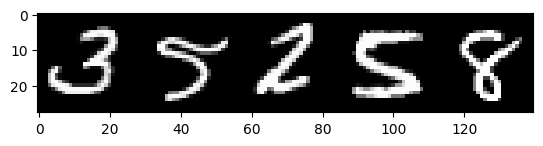

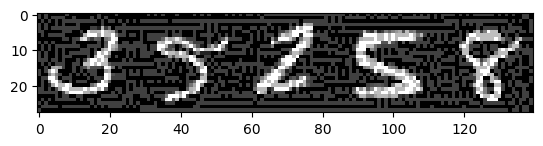

In [209]:
plt.imshow(org_list[0])
plt.show()
plt.imshow(perturbed_list[0])
plt.show()
# perturbation is almost imperceptible

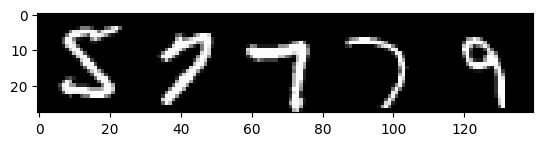

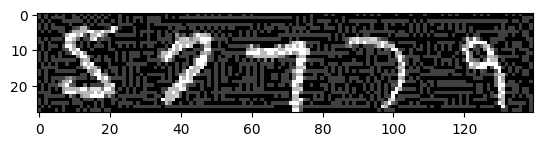

In [210]:
plt.imshow(org_list[1])
plt.show()
plt.imshow(perturbed_list[1])
plt.show()
# perturbation is almost imperceptible

In [211]:
np.sum(perturbed_list[0]!=org_list[0])/np.sum(org_list[0]==org_list[0])

0.6158163265306122

In [212]:
np.sum(perturbed_list[1]!=org_list[1])/np.sum(org_list[1]==org_list[1])

0.5670918367346939

[(1, '8'), (29, '5'), (57, '2'), (86, '5'), (114, '8')]


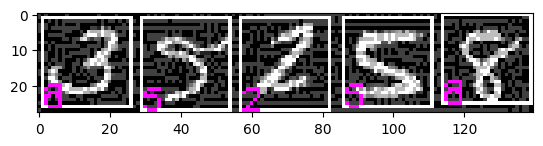

[(1, '8'), (29, '8'), (57, '7'), (114, '4')]


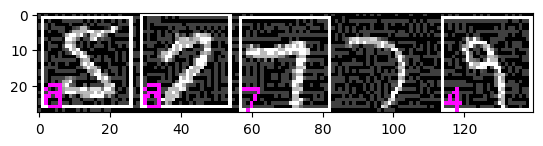

[(0, '8'), (29, '8'), (57, '8'), (85, '2'), (113, '6')]


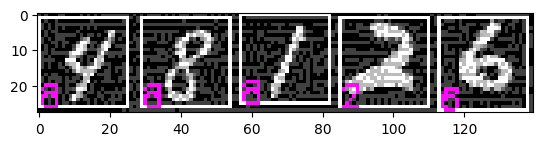

[(0, '8'), (28, '8'), (56, '8'), (85, '8'), (85, '9'), (113, '4')]


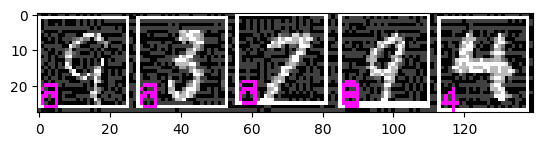

[(1, '2'), (29, '4'), (57, '2'), (85, '5'), (113, '4'), (113, '8')]


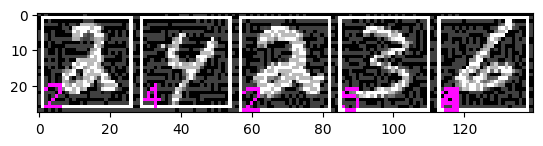

[(0, '5'), (28, '9'), (56, '2'), (113, '8')]


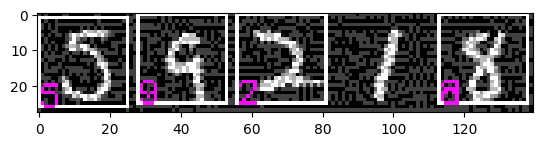

[(57, '8'), (85, '4'), (113, '4'), (113, '9')]


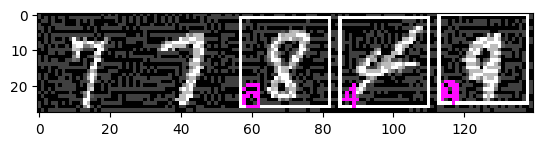

[(0, '4'), (28, '8'), (56, '9'), (85, '8'), (113, '9')]


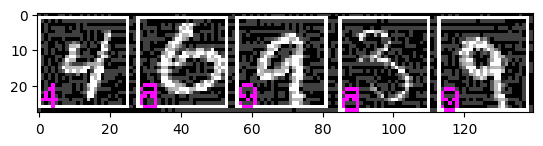

[(1, '5'), (29, '2'), (57, '3'), (85, '8'), (113, '0')]


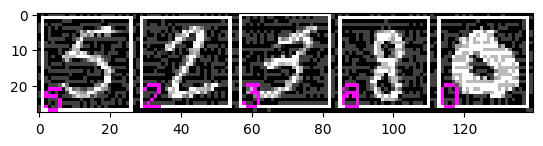

[(0, '5'), (29, '9'), (57, '4'), (85, '2'), (113, '8')]


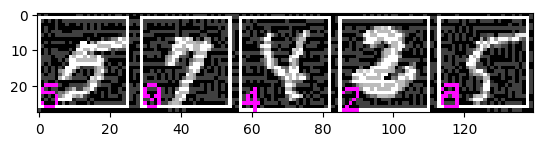

In [213]:
for i in range(len(perturbed_list)):
    img_temp = get_img_with_boxes(perturbed_list[i], perturbed_ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()

## Run model prediction (GANs perturbation, 128)

In [14]:
model=YOLO('./model_results/train/weights/best.pt')

In [21]:
for img in data_perturbed:
    model.predict(f'./sample_perturbed_images/{img}', save_txt=True)


image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_9995.png: 128x640 2 5s, 1 6, 1 8, 43.9ms
Speed: 0.6ms preprocess, 43.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict11
6 labels saved to runs/detect/predict11/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_9996.png: 128x640 1 3, 1 4, 1 5, 1 7, 1 9, 24.0ms
Speed: 0.3ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict11
7 labels saved to runs/detect/predict11/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_9997.png: 128x640 1 1, 1 5, 1 6, 1 8, 1 9, 24.1ms
Speed: 0.2ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict11
8 l

In [22]:
# for img in ['original_0.png','original_1.png', 'original_2.png','original_3.png','original_4.png']:
#     model.predict(f'./sample_perturbed_images/{img}', save_txt=True)

In [23]:
# images
img_list = []

for img in ['perturbed_1.png','perturbed_3.png','perturbed_4.png']:
    img_list.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))

ann_list = []
for file in ['perturbed_1.txt','perturbed_3.txt','perturbed_4.txt']:
    with open(f'./runs/detect/predict11/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

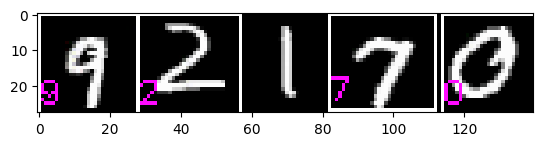

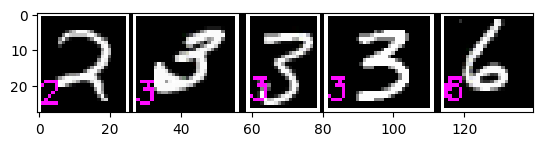

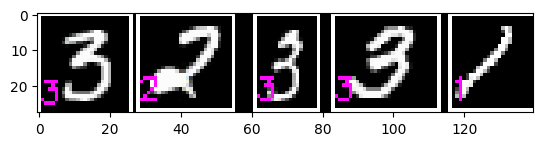

In [24]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()


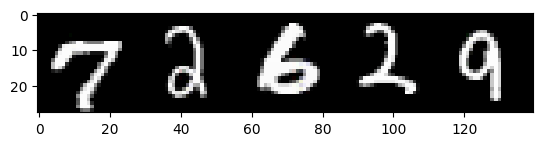

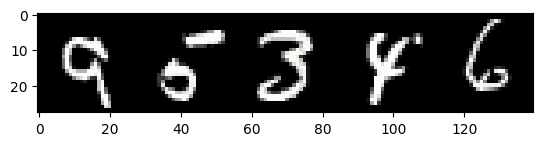

In [25]:
missed = []
for img in ['perturbed_0.png','perturbed_2.png']:
    missed.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))
    
for i in missed:
    plt.imshow(i)
    plt.show()
    

In [13]:
# ORIGINAL 
img_list = []

for img in ['original_0.png','original_1.png', 'original_2.png','original_3.png','original_4.png']:
    img_list.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))

ann_list = []
for file in ['original_0.txt','original_1.txt', 'original_2.txt','original_3.txt','original_4.txt']:
    with open(f'./runs/detect/predict5/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

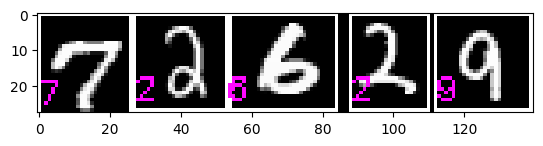

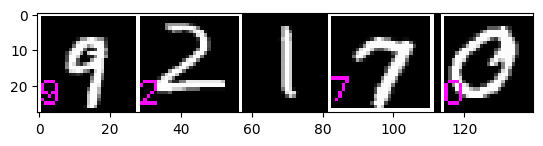

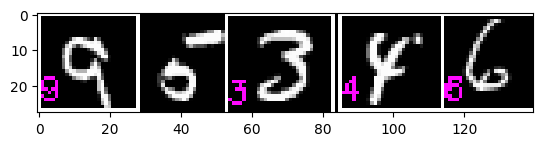

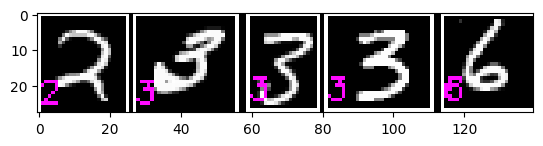

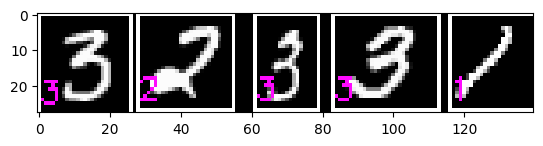

In [14]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()


## 256 imgsz data

In [21]:
model=YOLO('./model_results/model_digit_data_ver1_256/weights/best.pt')

In [22]:
model.predict(f'./data/digits_data_ver1/test/images/', save_txt=True)


image 1/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/0.png: 64x256 1 3, 1 6, 1 7, 2 8s, 14.8ms
image 2/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/1.png: 64x256 1 1, 1 3, 1 5, 1 7, 1 8, 11.8ms
image 3/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/10.png: 64x256 1 3, 1 4, 1 6, 1 7, 1 8, 12.3ms
image 4/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/11.png: 64x256 1 1, 2 4s, 1 7, 1 9, 12.6ms
image 5/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/12.png: 64x256 1 1, 2 2s, 1 5, 1 6, 10.1ms
image 6/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/13.png: 64x256 1 0, 1 8, 3 9s, 8.9ms
image 7/100 /Users/jay.je/D

image 52/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/55.png: 64x256 1 0, 1 2, 1 3, 1 4, 1 6, 9.8ms
image 53/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/56.png: 64x256 1 3, 1 4, 1 6, 2 9s, 10.2ms
image 54/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/57.png: 64x256 3 0s, 2 5s, 11.5ms
image 55/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/58.png: 64x256 1 0, 2 3s, 1 5, 1 8, 8.6ms
image 56/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/59.png: 64x256 1 2, 2 3s, 1 4, 1 7, 9.2ms
image 57/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/6.png: 64x256 1 1, 1 2, 1 4, 2 5s, 9.1ms
image 58/100 /Users/jay.je/Docum

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0

In [23]:
# images
img_list = []

for img in ['10.png','20.png','30.png','40.png']:
    img_list.append(np.array(Image.open(f'./data/digits_data_ver1/test/images/{img}')))

ann_list = []
for file in ['10.txt','20.txt','30.txt','40.txt']:
    with open(f'./runs/detect/predict6/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

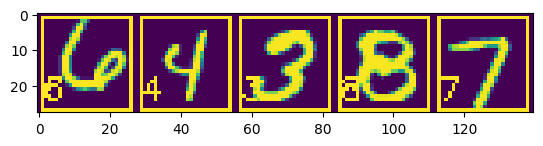

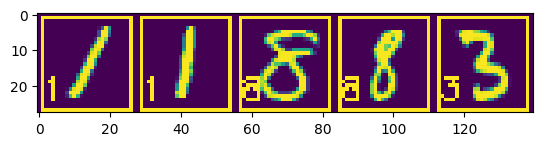

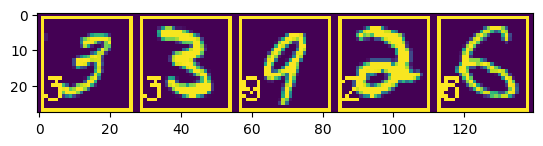

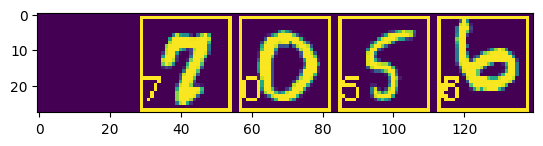

In [24]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()

## YOLO inference for google data

In [3]:
model_g=YOLO('./data/model_google_digits_data/weights/best.pt')

In [ ]:
# for img in ['1013.png','7082.png', '9981.png','695.png','802.png','1273.png']:
model_g.predict(f'./data/google_digit_data/test/images/', save_txt=True)

In [28]:
# images
img_list = []

for img in ['100.png','200.png','300.png','400.png','500.png']:
    img_list.append(np.array(Image.open(f'./data/google_digit_data/test/images/{img}')))

ann_list = []
for file in ['100.txt','200.txt','300.txt','400.txt','500.txt']:
    with open(f'./runs/detect/predict3/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(sample_annotation)
        f.close()

In [29]:
ann_list_fin = []
for idx, val in enumerate(ann_list):
    print(img_list[idx].shape)
    h = img_list[idx].shape[0]
    w = img_list[idx].shape[1]
    ann_list_fin.append(convert_from_yolo_to_cv2(val, w, h))

(133, 353, 3)
(108, 229, 3)
(43, 86, 3)
(136, 418, 3)
(48, 134, 3)


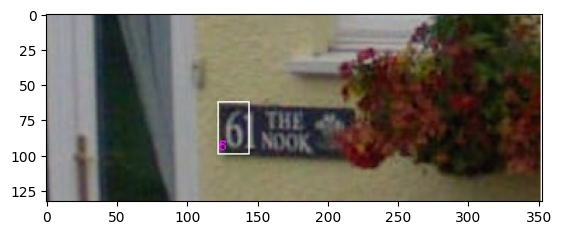

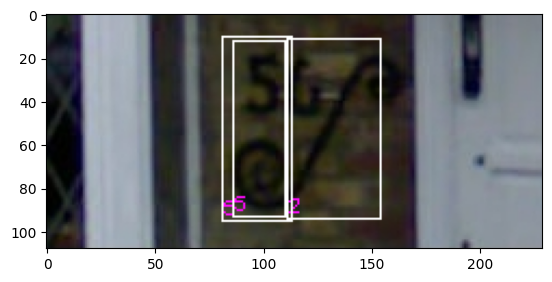

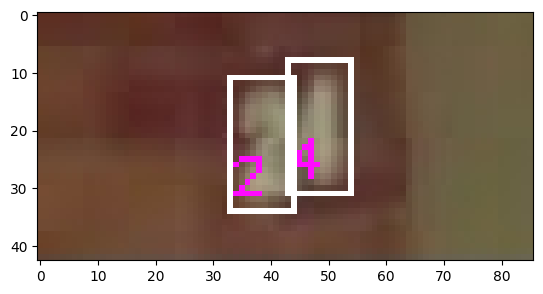

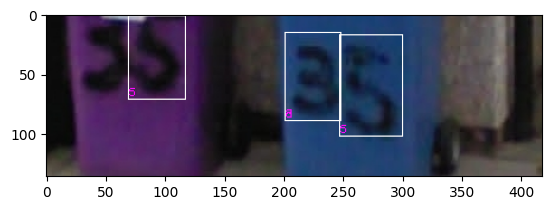

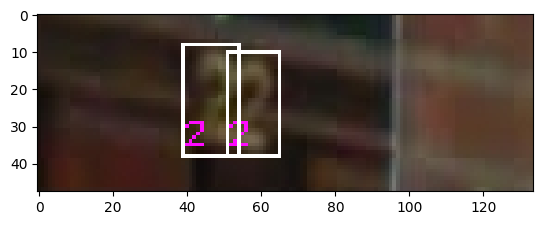

In [30]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list_fin[i])
    
    plt.imshow(img_temp)
    plt.show()